Step 1:

Imports the csv and prepares for later

In [1]:
import pandas as pd
import numpy as np
import sklearn.datasets 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
sca = StandardScaler()
enc = LabelEncoder()
oenc = OneHotEncoder()

df= pd.read_csv("data_refined.csv")
df

,Unnamed: 0,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis_encoded
0,0,M,1.097064,-2.073335,1.269934,0.984375,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1
1,1,M,1.829821,-0.353632,1.685955,1.908708,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,1
2,2,M,1.579888,0.456187,1.566503,1.558884,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,1
3,3,M,-0.768909,0.253732,-0.592687,-0.764464,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,1
4,4,M,1.750297,-1.151816,1.776573,1.826229,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,564,M,2.110995,0.721473,2.060786,2.343856,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1
565,565,M,1.704854,2.085134,1.615931,1.723842,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,1
566,566,M,0.702284,2.045574,0.672676,0.577953,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,1
567,567,M,1.838341,2.336457,1.982524,1.735218,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,1


Step 2:

Uses Correlation to find the columns with a higher rating than 0.6 and prints the resulting important columns

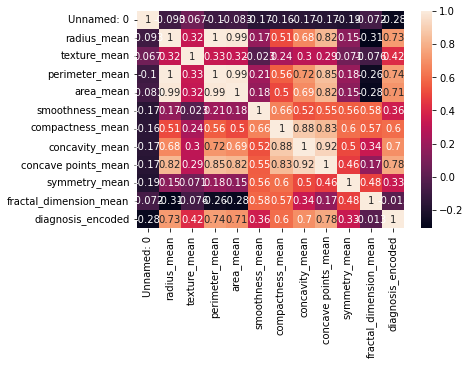

In [2]:
sns.heatmap(df.corr(), annot = True)
cor=df.corr().values

In [3]:
a=df[df.columns[1:]].corr() ['diagnosis_encoded'][:]
result=a[abs(a)>0.6]
result

radius_mean            0.730029
perimeter_mean         0.742636
area_mean              0.708984
concavity_mean         0.696360
concave points_mean    0.776614
diagnosis_encoded      1.000000
Name: diagnosis_encoded, dtype: float64

In [4]:
df2=df.copy()

In [5]:
df2 = df2.drop(['Unnamed: 0','diagnosis','texture_mean', 'smoothness_mean', 'compactness_mean','symmetry_mean','fractal_dimension_mean'], axis='columns')


In [6]:
df2

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,diagnosis_encoded
0,1.097064,1.269934,0.984375,0.30010,0.14710,1
1,1.829821,1.685955,1.908708,0.08690,0.07017,1
2,1.579888,1.566503,1.558884,0.19740,0.12790,1
3,-0.768909,-0.592687,-0.764464,0.24140,0.10520,1
4,1.750297,1.776573,1.826229,0.19800,0.10430,1
...,...,...,...,...,...,...
564,2.110995,2.060786,2.343856,0.24390,0.13890,1
565,1.704854,1.615931,1.723842,0.14400,0.09791,1
566,0.702284,0.672676,0.577953,0.09251,0.05302,1
567,1.838341,1.982524,1.735218,0.35140,0.15200,1


Step 3:

Splits the 2 datasets, the Non-Reduced and the Reduced sets and performs train_test_split on them

Un-Reduced data

In [7]:
x1 = df.iloc[:, 2:12]
y1 = df.iloc[:, 12]

In [8]:
train_ratio = 0.80
validation_ratio = 0.10
test_ratio = 0.10
from sklearn.model_selection import train_test_split
# train is now 80% of the entire data set
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 10% of the initial data set
x1_val, x1_test, y1_val, y1_test = train_test_split(x1_test, y1_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(x1_train, x1_val, x1_test)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
323     1.764497      0.516691        1.809525   1.732374          0.11700   
490    -0.533178      0.733108       -0.567973  -0.535798          0.08192   
482    -0.186680     -1.216974       -0.191495  -0.308839          0.10710   
169     0.239341     -0.544452        0.175098   0.088198          0.09855   
476     0.020650      0.288638        0.018164  -0.103779          0.08931   
..           ...           ...             ...        ...              ...   
98     -0.717787     -1.500877       -0.726143  -0.689095          0.08983   
291     0.236501     -0.044132        0.208462   0.092180          0.08992   
201     0.969258      0.007063        0.952769   0.843876          0.08968   
549    -0.939318      1.144999       -0.950630  -0.834144          0.08192   
461     3.775318      1.624375        3.910226   5.250529          0.10840   

     compactness_mean  concavity_mean  concave points_mean  sym

Reduced data

In [9]:
x2 = df2.iloc[:, 0:5]
y2 = df2.iloc[:, 5]

In [10]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=1 - train_ratio)


x2_val, x2_test, y2_val, y2_test = train_test_split(x2_test, y2_test, test_size=test_ratio/(test_ratio + validation_ratio), random_state=0) 

print(x2_train, x2_val, x2_test)

     radius_mean  perimeter_mean  area_mean  concavity_mean  \
139    -0.808671       -0.781338  -0.768161         0.04635   
446     1.028901        1.043388   0.929199         0.16980   
393     2.125195        2.159642   2.139081         0.28100   
212     3.971288        3.976130   5.244841         0.32010   
433     1.332796        1.307005   1.294382         0.15940   
..           ...             ...        ...             ...   
160    -0.675185       -0.653649  -0.668618         0.06843   
110    -1.235545       -1.213835  -1.037213         0.04334   
343     1.577048        1.562384   1.533287         0.18630   
118     0.469393        0.565581   0.363223         0.21330   
455    -0.212241       -0.231861  -0.277838         0.02819   

     concave points_mean  
139              0.04796  
446              0.08293  
393              0.15620  
212              0.15950  
433              0.08744  
..                   ...  
160              0.03738  
110              0.01778  


Step 4.1:

Runs both sets through their Classifiers

Non Reduced KNN Optimization

In [11]:
from sklearn.neighbors import KNeighborsClassifier
scores1 = []
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x1_train,y1_train)
    score_i = knn.score(x1_test,y1_test)
    scores1.append(score_i)

Text(0, 0.5, 'Accuracy')

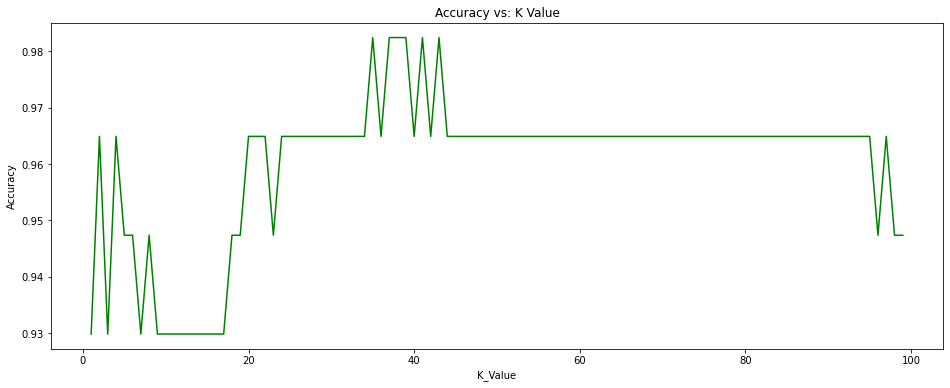

In [12]:
plt.figure(figsize =(16,6))
plt.plot(range(1,100),scores1,color = 'green')
plt.title('Accuracy vs: K Value')
plt.xlabel('K_Value')
plt.ylabel('Accuracy')

In [13]:
kn1= max(scores1)
best_knn1 = scores1.index(kn1)+1
print(best_knn1)

35


Reduced KNN Optimization

In [14]:
scores2 = []
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x2_train,y2_train)
    score_i = knn.score(x2_test,y2_test)
    scores2.append(score_i)

Text(0, 0.5, 'Accuracy')

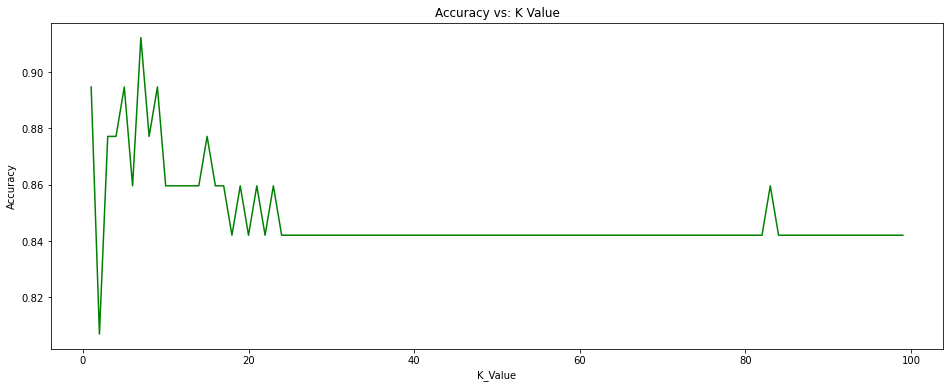

In [15]:
plt.figure(figsize =(16,6))
plt.plot(range(1,100),scores2,color = 'green')
plt.title('Accuracy vs: K Value')
plt.xlabel('K_Value')
plt.ylabel('Accuracy')

In [16]:
kn2=max(scores2)
best_knn2 = scores2.index(kn2)+1
print(best_knn2)

7


KNN Non-Reduced and Score+Matrix

0.9298245614035088


Text(0.5, 1.0, 'KNN Non-Reduced Predictions')

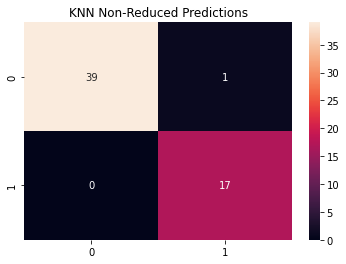

In [17]:
best_knn_model1 = KNeighborsClassifier(n_neighbors = best_knn1)
best_knn_model1.fit(x1_train, y1_train)

predictions_best1 = best_knn_model1.predict(x1_test)

print(best_knn_model1.score(x1_val,y1_val))
sns.heatmap(confusion_matrix(y1_test,predictions_best1), 
           annot = True).set_title("KNN Non-Reduced Predictions")

KNN Reduced and Score+Matrix

0.9649122807017544


Text(0.5, 1.0, 'KNN Reduced Predictions')

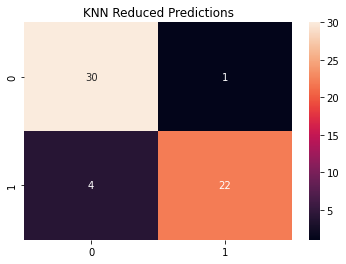

In [18]:
best_knn_model2 = KNeighborsClassifier(n_neighbors = best_knn2)
best_knn_model2.fit(x2_train, y2_train)

predictions_best2 = best_knn_model2.predict(x2_test)

print(best_knn_model2.score(x2_val,y2_val))
sns.heatmap(confusion_matrix(y2_test,predictions_best2), 
           annot = True).set_title("KNN Reduced Predictions")

Random Forest Classication Non-Reduced and Score+Matrix

0.9473684210526315


Text(0.5, 1.0, 'Random Forest Non-Reduced Predictions')

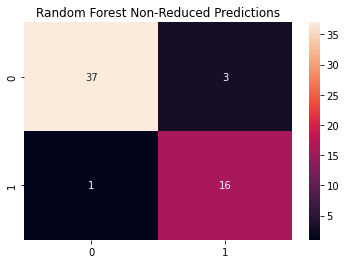

In [19]:
from sklearn.ensemble import RandomForestClassifier 
RFmodel1 = RandomForestClassifier(n_estimators=100, criterion='gini')
RFmodel1.fit(x1_train, y1_train)
RFy1_pred = RFmodel1.predict(x1_test)
    
RFscore1 = RFmodel1.score(x1_val,y1_val)
print(RFscore1)
sns.heatmap(confusion_matrix(y1_test,RFy1_pred), 
           annot = True).set_title("Random Forest Non-Reduced Predictions")

Random Forest Classification Reduced and Score+Matrix

0.9473684210526315


Text(0.5, 1.0, 'Random Forest Reduced Predictions')

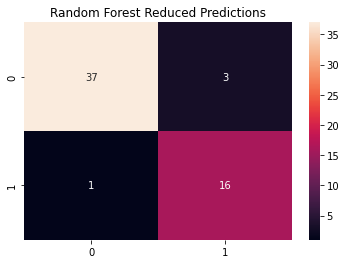

In [20]:
RFmodel2 = RandomForestClassifier(n_estimators=100, criterion='gini')
RFmodel2.fit(x2_train, y2_train)
RFy2_pred = RFmodel2.predict(x2_test)
    
RFscore2 = RFmodel2.score(x2_val,y2_val)
print(RFscore2)
sns.heatmap(confusion_matrix(y1_test,RFy1_pred), 
           annot = True).set_title("Random Forest Reduced Predictions")

SVC Non Reduced and Score + Matrix

0.9473684210526315


Text(0.5, 1.0, 'SVC Non-Reduced Predictions')

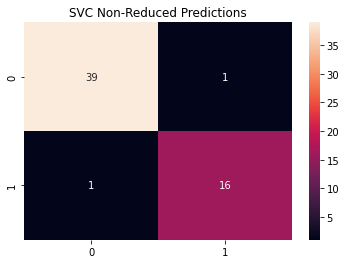

In [25]:
from sklearn.svm import SVC
from sklearn import datasets
    
S1classifier = SVC(kernel='rbf',C=1,gamma='auto')
S1model = S1classifier.fit(x1_train, y1_train)
Sy1_pred = S1classifier.predict(x1_test)
Sscore1 = S1model.score(x1_val,y1_val) #Gets the accuracy of our end result

print(Sscore1)
sns.heatmap(confusion_matrix(y1_test,Sy1_pred), 
           annot = True).set_title("SVC Non-Reduced Predictions")

SVC Reduced and Score+Matrix

0.9298245614035088


Text(0.5, 1.0, 'SVC Non-Reduced Predictions')

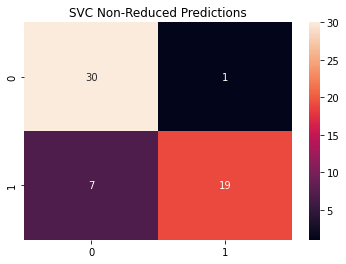

In [34]:
S2classifier = SVC(kernel='rbf',C=1,gamma='auto')
S2model = S2classifier.fit(x2_train, y2_train)
Sy2_pred = S2classifier.predict(x2_test)
Sscore2 = S2model.score(x2_val,y2_val) #Gets the accuracy of our end result

print(Sscore2)
sns.heatmap(confusion_matrix(y2_test,Sy2_pred), 
           annot = True).set_title("SVC Non-Reduced Predictions")

Step4.2:

At the end of the day out of all of them the most consistent I got was the KNN Reduced as almost always it ended up at 92-96% while the others would change between 84-95% even while changing values and information 

Step 5:

I decided to try and only remove things below 0.7 instead of 0.6 for these ones.

After going through it all it seems that SVC actually has the highest chance of being correct, its just that I may have removed the columns from before this a bit to thoroughly and lowered my chances for most of my predicitions.

In [35]:
a2=df[df.columns[1:]].corr() ['diagnosis_encoded'][:]
result2=a[abs(a2)>0.7]
result2

radius_mean            0.730029
perimeter_mean         0.742636
area_mean              0.708984
concave points_mean    0.776614
diagnosis_encoded      1.000000
Name: diagnosis_encoded, dtype: float64

In [37]:
df3=df.copy()
df3 = df3.drop(['Unnamed: 0','diagnosis','texture_mean', 'smoothness_mean', 'compactness_mean','concavity_mean','symmetry_mean','fractal_dimension_mean'], axis='columns')

In [38]:
df3

,radius_mean,perimeter_mean,area_mean,concave points_mean,diagnosis_encoded
0,1.097064,1.269934,0.984375,0.14710,1
1,1.829821,1.685955,1.908708,0.07017,1
2,1.579888,1.566503,1.558884,0.12790,1
3,-0.768909,-0.592687,-0.764464,0.10520,1
4,1.750297,1.776573,1.826229,0.10430,1
...,...,...,...,...,...
564,2.110995,2.060786,2.343856,0.13890,1
565,1.704854,1.615931,1.723842,0.09791,1
566,0.702284,0.672676,0.577953,0.05302,1
567,1.838341,1.982524,1.735218,0.15200,1


In [39]:
x3 = df3.iloc[:, 0:4]
y3 = df3.iloc[:, 4]

In [40]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 10% of the initial data set
x3_val, x3_test, y3_val, y3_test = train_test_split(x3_test, y3_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(x3_train, x3_val, x3_test)

     radius_mean  perimeter_mean  area_mean  concave points_mean
306    -0.263364       -0.325363  -0.334435             0.003261
262     0.898254        0.923936   0.833069             0.075070
150    -0.320167       -0.348429  -0.385345             0.026450
12      1.432201        1.665360   1.331355             0.111800
234    -1.295188       -1.308161  -1.067361             0.016670
..           ...             ...        ...                  ...
563     1.929226        2.101976   1.968434             0.147400
500     0.259222        0.278486   0.098153             0.061420
178    -0.317327       -0.410215  -0.365436             0.001852
88     -0.501936       -0.502069  -0.536936             0.037450
41     -0.902396       -0.826648  -0.807125             0.056690

[455 rows x 4 columns]      radius_mean  perimeter_mean  area_mean  concave points_mean
119     1.085703        0.915698   0.930337             0.055960
144    -0.959199       -0.976580  -0.852062             0.007875
2

In [41]:
scores3 = []
for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x3_train,y3_train)
    score_i = knn.score(x3_test,y3_test)
    scores3.append(score_i)

Text(0, 0.5, 'Accuracy')

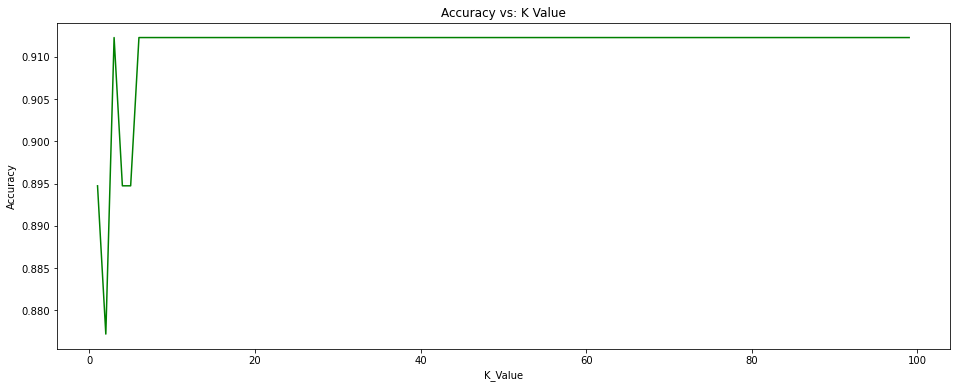

In [43]:
plt.figure(figsize =(16,6))
plt.plot(range(1,100),scores3,color = 'green')
plt.title('Accuracy vs: K Value')
plt.xlabel('K_Value')
plt.ylabel('Accuracy')

In [45]:
kn3= max(scores3)
best_knn3 = scores3.index(kn3)+1
print(best_knn3)

3


0.8947368421052632


Text(0.5, 1.0, 'KNN Super Reduced Predictions')

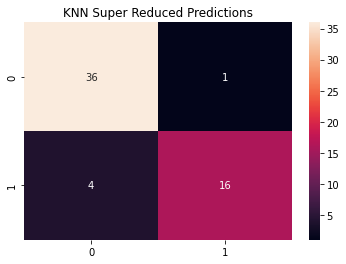

In [51]:
best_knn_model3 = KNeighborsClassifier(n_neighbors = best_knn3)
best_knn_model3.fit(x3_train, y3_train)

predictions_best3 = best_knn_model3.predict(x3_test)

print(best_knn_model3.score(x3_val,y3_val))
sns.heatmap(confusion_matrix(y3_test,predictions_best3), 
           annot = True).set_title("KNN Super Reduced Predictions")

0.9122807017543859


Text(0.5, 1.0, 'Random Forest Super Reduced Predictions')

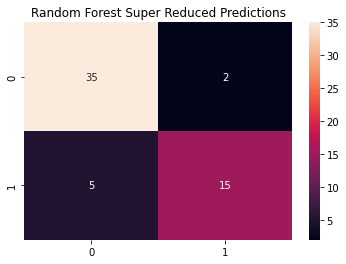

In [59]:
RFmodel3 = RandomForestClassifier(n_estimators=100, criterion='entropy')
RFmodel3.fit(x3_train, y3_train)
RFy3_pred = RFmodel3.predict(x3_test)
    
RFscore3 = RFmodel3.score(x3_val,y3_val)
print(RFscore3)
sns.heatmap(confusion_matrix(y3_test,RFy3_pred), 
           annot = True).set_title("Random Forest Super Reduced Predictions")

0.9298245614035088


Text(0.5, 1.0, 'SVC Non-Reduced Predictions')

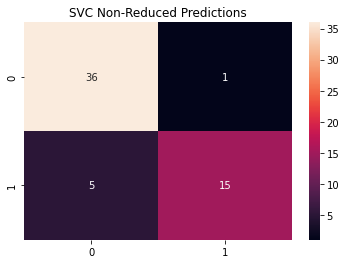

In [69]:
S3classifier = SVC(kernel='linear',C=1,gamma='auto')
S3model = S3classifier.fit(x3_train, y3_train)
Sy3_pred = S3classifier.predict(x3_test)
Sscore3 = S3model.score(x3_val,y3_val) #Gets the accuracy of our end result

print(Sscore3)
sns.heatmap(confusion_matrix(y3_test,Sy3_pred), 
           annot = True).set_title("SVC Non-Reduced Predictions")